In [1]:
import numpy
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.plan_a.transformer import MarketSampleTransformer, MarketSampleDataset, TabTransformer
from etrade.spot.forecast.plan_a.simulator4 import PredictBasedMarketSimulator

from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

In [9]:
market_len = 4
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (0.5,1), (1, 2)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 4)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 20), (1, 10), (1, 4)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    "predict_weight": numpy.full((3, market_len), 1),
    "noise_weight_range": ((0.01, 0.05), (0.01, 0.05), (0.01, 0.05)),
    "market_len": market_len
}

station = Station("station", 50)
br = BasicRecycle(0.9, 1.05)
simulator = PredictBasedMarketSimulator(**init_kwargs)

In [10]:
aq, dp, rp = simulator.predicted_random(1000)

[5.972103380206221, 31.008044485683474, 32.53889610883509, 23.134511832144614]
[41.284777398688234, 49.95656407229575, 0.2959459129138402, 0.12442458242232846]
1.010820699496794


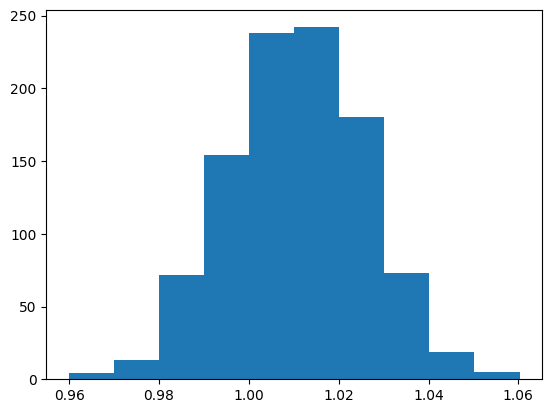

In [11]:
x = simulator.predicted_optimize(station, br, aq, dp, rp)
print(numpy.mean(aq, axis=1).tolist())
print(x.tolist())

print(
    numpy.sum(numpy.mean(aq, axis=1)) / numpy.sum(x)
)

pyplot.hist(numpy.sum(aq, axis=0) / numpy.sum(x))
pyplot.show()